In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
from pylab import rcParams

In [2]:
%matplotlib inline

In [3]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [4]:
def fib(n):
    a, b = 0, 1
    for i in range(0, n):
        a, b = b, a + b
    return a

def xp_for_level(level):
    if level <= 1:
        return 0
    return (10 * fib(level) + 1) + xp_for_level(level - 1)

In [5]:
data = {n: xp_for_level(n) for n in range(1, 21)}.items()

In [6]:
df = pd.DataFrame(list(data), columns=["level", "xp"])

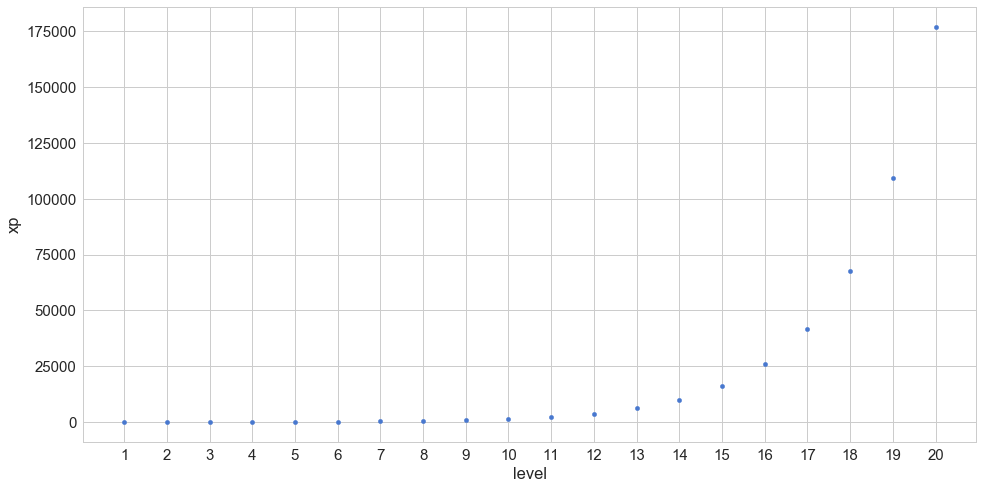

In [7]:
df.plot(kind='scatter', x='level', y='xp', xticks=df.level);

In [8]:
XP_BONUS_MULTIPLIER = 1.2

# Quest bonus

In [9]:
def xp_for_quest():
    rewards = [5, 10, 15, 20, 30]
    most_important_bonus = 2 if random.random() >= 0.5 else 1
    return random.choice(rewards) * XP_BONUS_MULTIPLIER * most_important_bonus

In [10]:
q_xps = [xp_for_quest() for _ in range(10000)]

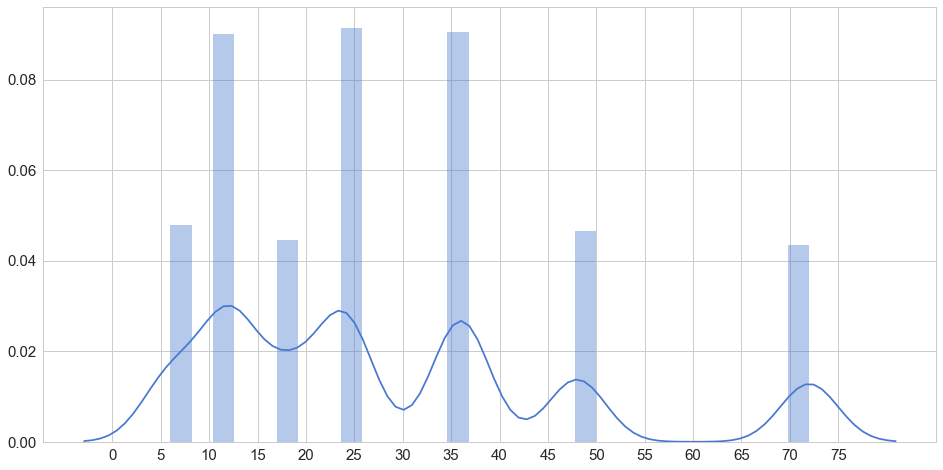

In [11]:
fig = sns.distplot(q_xps);
plt.xticks(range(0, 80, 5));

# Daily challenge bonus

In [12]:
def xp_daily_challenge():
    rewards = [20, 30, 50, 80, 100]
    return random.choice(rewards) * XP_BONUS_MULTIPLIER

In [13]:
dc_xps = [xp_daily_challenge() for _ in range(10000)]

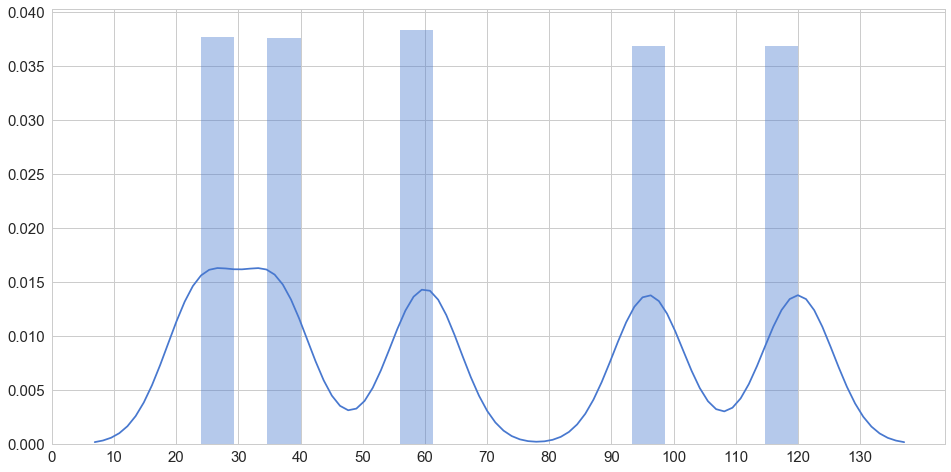

In [14]:
fig = sns.distplot(dc_xps);
plt.xticks(range(0, 140, 10));

# Challenge bonus

In [15]:
def xp_challenge():
    rewards = [40, 60, 100, 160, 200]
    difficulty = random.choice([2, 3, 3, 4])
    return random.choice(rewards) * difficulty * XP_BONUS_MULTIPLIER

In [16]:
c_xps = [xp_challenge() for _ in range(10000)]

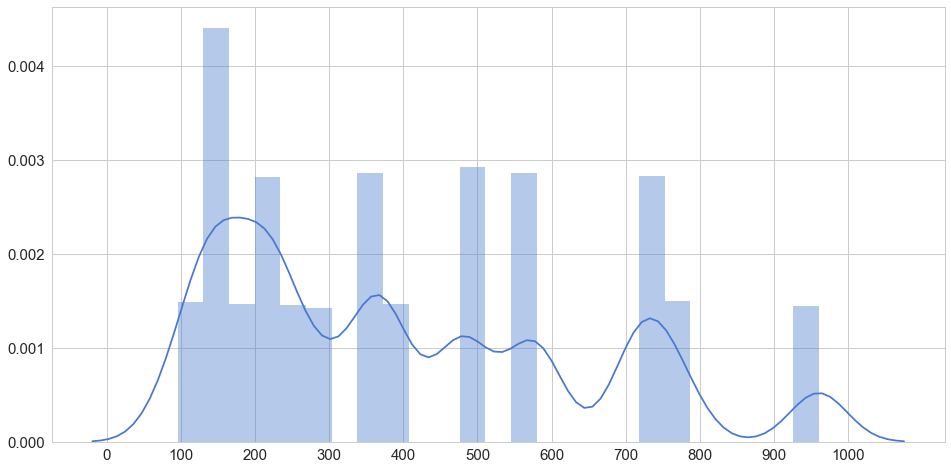

In [17]:
fig = sns.distplot(c_xps);
plt.xticks(range(0, 1100, 100));

# Daily XP

In [18]:
def daily_xp():
    completed_quests = random.choices(
        list(range(1, 9)), 
        [.05, .05, 0.1, 0.4, .05, .05, .05, .05], 
        k = 1
    )[0]
    total_xp = sum([xp_for_quest() for _ in range(completed_quests)])
    if random.random() <= 0.35:
        total_xp += xp_daily_challenge()
    if random.random() <= 0.05:
        total_xp += xp_challenge()
    return total_xp

In [19]:
daily_xps = [daily_xp() for _ in range(100000)]

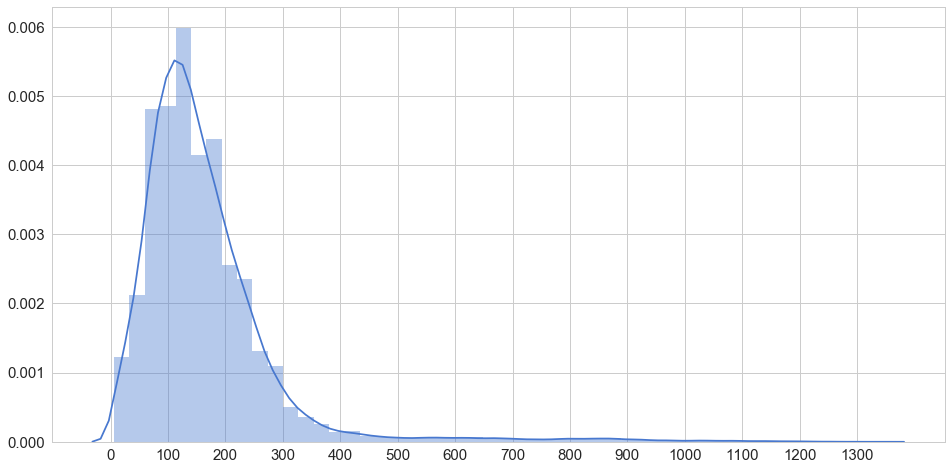

In [20]:
fig = sns.distplot(daily_xps);
plt.xticks(range(0, 1400, 100));

# Simulate leveling up

In [21]:
level = 1
level_ups = {}
total_xp = 0
for d in range(1, 50 * 365): # 50 years
    xp = daily_xp()
    while xp_for_level(level + 1) < total_xp + xp:
        level += 1
        level_ups[level] = d
    total_xp += xp

In [22]:
day_intervals = {1: 0}
for k, v in level_ups.items():
    if k == 2:
        day_intervals[k] = v - 1
    else:
        day_intervals[k] = v - level_ups[k - 1] 

In [23]:
intervals_df = pd.DataFrame(list(day_intervals.items()), columns=["level", "days_interval"])

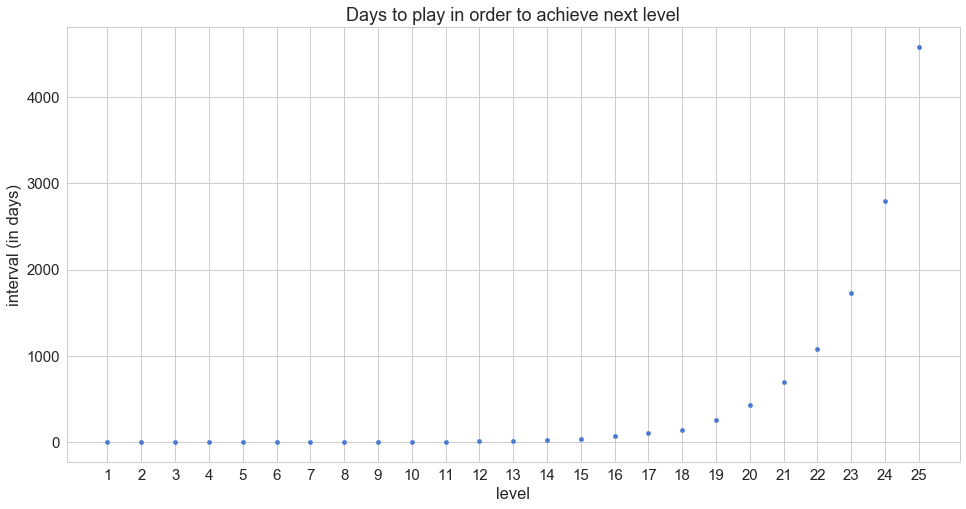

In [24]:
ax = intervals_df.plot(
    kind='scatter',
    x='level', 
    y='days_interval',
    xticks=intervals_df.level, 
    title="Days to play in order to achieve next level"
)
ax.set_ylabel("interval (in days)");

# New required XP function

In [25]:
def n_xp_for_level(level):
    if level < 1:
        return 0
    return np.log(level) * (level ** np.e)

In [26]:
n = 30
ls = [n_xp_for_level(x) for x in range(1, n + 1)]

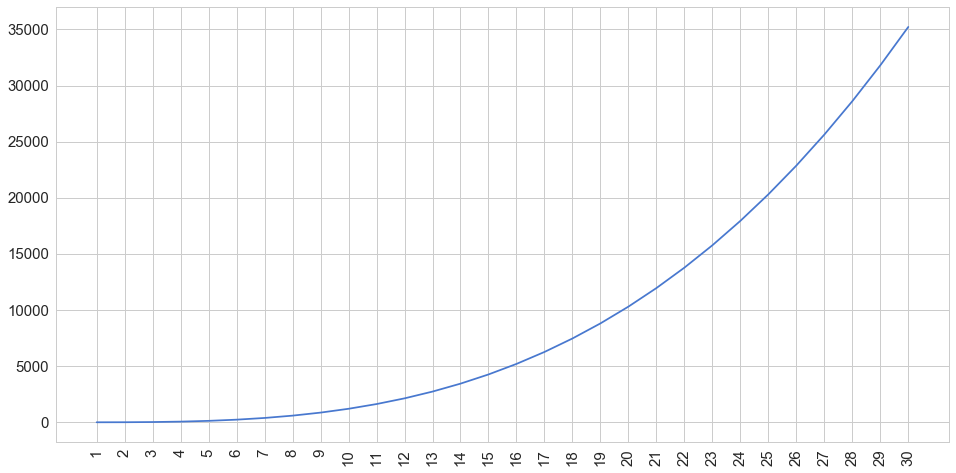

In [27]:
x = range(1, n + 1)
plt.plot(x, ls);
plt.xticks(x, range(1, n + 2), rotation='vertical');

In [28]:
level_intervals = [n_xp_for_level(l) - n_xp_for_level(l - 1) for l in range(1, n + 1)]

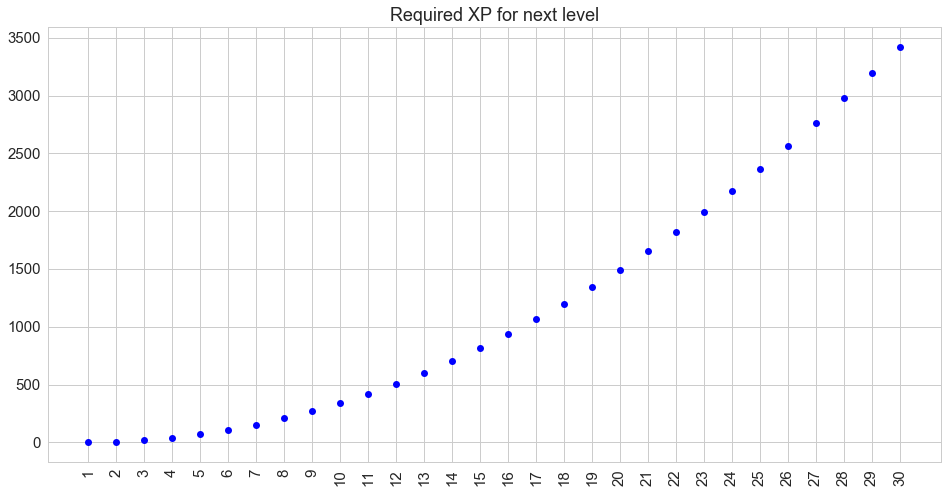

In [29]:
x = range(1, n + 1)
plt.plot(x, level_intervals, 'bo');
plt.title("Required XP for next level")
plt.xticks(x, range(1, n + 2), rotation='vertical');

In [79]:
n_xp_for_level(2)

50

[0, 50, 100, 150, 200, 360, 480, 560, 640, 720, 800, 880, 960, 1040, 1120, 1200, 1280, 1360, 1440, 1520, 1600, 1680, 1760, 1840, 1920, 2000, 2080, 2160, 2240, 2320, 2400, 2480, 2560, 2640, 2720, 2800, 2880, 2960, 3040, 3120, 3200, 3280, 3360, 3440, 3520, 3600, 3680, 3760, 3840, 3920, 4000, 4080, 4160, 4240, 4320, 4400, 4480, 4560, 4640, 4720, 4800, 4880, 4960, 5040, 5120, 5200, 5280, 5360, 5440, 5520, 5600, 5680, 5760, 5840, 5920, 6000, 6080, 6160, 6240, 6320, 6400, 6480, 6560, 6640, 6720, 6800, 6880, 6960, 7040, 7120, 7200, 7280, 7360, 7440, 7520, 7600, 7680, 7760, 7840, 7920]


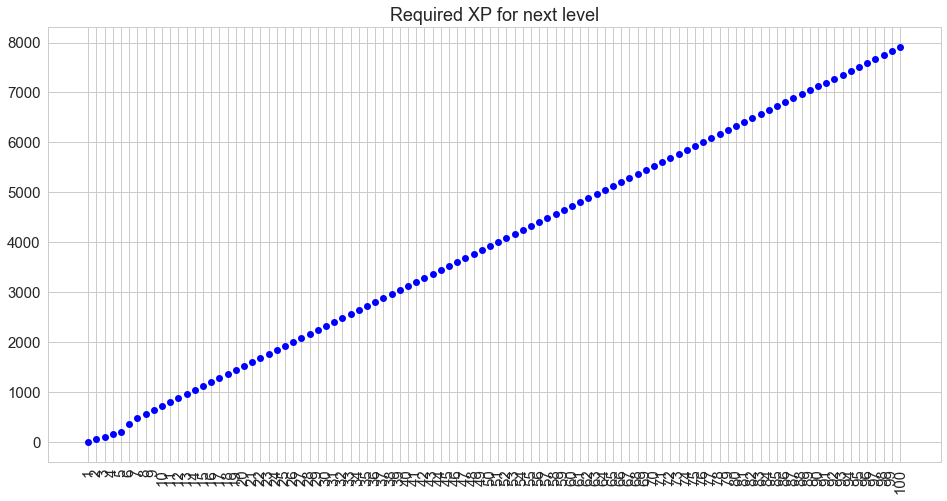

In [129]:
n = 100

LARGE_FACTOR = 80
SMALL_FACTOR = 50

def n_xp_for_level(level):
    if level <= 1:
        return 0
    
    switch_factor_level = 6
    
    if level == switch_factor_level:
        return n_xp_for_level(level - 1) + (n_xp_for_level(level - 1) - n_xp_for_level(level - 2)) + LARGE_FACTOR * 2
    factor = SMALL_FACTOR if level < switch_factor_level else LARGE_FACTOR
    return (factor * (level - 1)) + n_xp_for_level(level - 1)
#     if level == 2:
#         return 50
#     if level == 3:
#         return 150 + n_xp_for_level(level - 1)
#     if level == 4:
#         return 250 + n_xp_for_level(level - 1)
#     return ((np.log(level) * (level ** np.e)))
level_intervals = [n_xp_for_level(l) - n_xp_for_level(l - 1) for l in range(1, n + 1)]
print(level_intervals)
x = range(1, n + 1)
plt.plot(x, level_intervals, 'bo');
plt.title("Required XP for next level")
plt.xticks(x, range(1, n + 2), rotation='vertical');

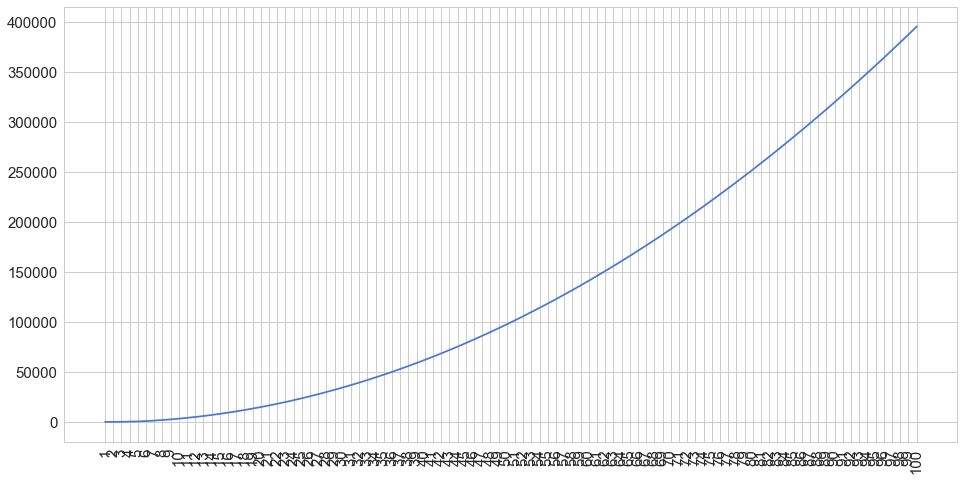

In [130]:
ls = [n_xp_for_level(x) for x in range(1, n + 1)]
x = range(1, n + 1)
plt.plot(x, ls);n_xp_for_level(level - 1)
plt.xticks(x, range(1, n + 2), rotation='vertical');

In [131]:
level = 1
level_ups = {}
total_xp = 0
for d in range(1, 1 * 365): # 2 years
    xp = daily_xp()
    while n_xp_for_level(level + 1) < total_xp + xp:
        level += 1
        level_ups[level] = d
    total_xp += xp

In [132]:
day_intervals = {1: 0}
for k, v in level_ups.items():
    if k == 2:
        day_intervals[k] = v - 1
    else:
        day_intervals[k] = v - level_ups[k - 1] 

In [133]:
intervals_df = pd.DataFrame(list(day_intervals.items()), columns=["level", "days_interval"])

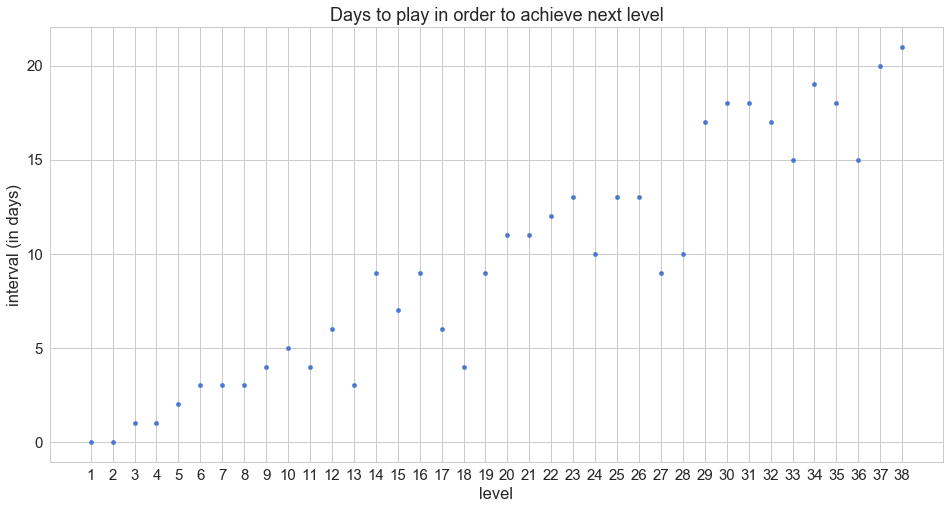

In [134]:
ax = intervals_df.plot(
    kind='scatter',
    x='level', 
    y='days_interval',
    xticks=intervals_df.level, 
    title="Days to play in order to achieve next level"
)
ax.set_ylabel("interval (in days)");